# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
np.random.seed(11)
df = pd.read_csv('data/human_body_temperature.csv')

We have a W value of 0.9865769743919373 with a p-value of 0.2331680953502655 which indicates that we cannot reject the null hypothesis that our population distribution (the distirbution of body temperatures) is normally distributed


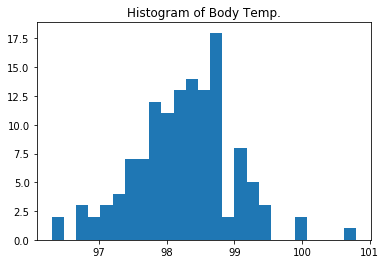

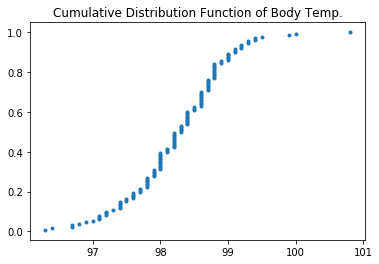

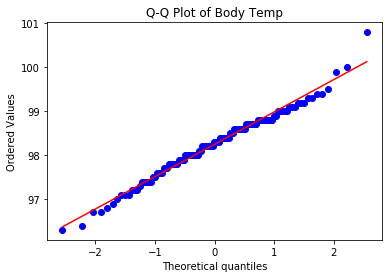

<Figure size 432x288 with 0 Axes>

In [2]:
plt.hist(df['temperature'], bins = 25)
plt.title('Histogram of Body Temp.')
plt.figure()

plt.plot(sorted(df['temperature']), (np.arange(1, len(df['temperature']) +1)/len(df['temperature'])), marker = '.', linestyle = 'none')
plt.title('Cumulative Distribution Function of Body Temp.')
plt.figure()

st.probplot(df['temperature'], plot=plt)
plt.title('Q-Q Plot of Body Temp')
plt.figure()
(W, p) = st.shapiro(df['temperature'])
print("We have a W value of " + str(W) + " with a p-value of " + str(p) + " which indicates that we cannot reject the null hypothesis that our population distribution (the distirbution of body temperatures) is normally distributed")



#### Question 1
We first plot the histogram, but depending upon the number of bins, we can have many interpretations. If we try 20 bins, we see an approximately normal, bi-modal graph, but if we try 25 bins, we see a graph that is approximately normal but unimodal. However, both graphs have weak right tails. We can turn to the Cumulative Distribution which gets rid of any issues with the binning. We do get to see that is has a nice curve and again is approximately normally distributed. However, these are only graphical representations and we need a more concrete interpretation. We move to calculating the Shapiro-Wilk test which divides the slop from the Q-Q plot against the sum of squares.
Since both essentially estimate the variance, we should get a value of 1 if the distribution is normal. This becomes the null hypothesis, that if our sample is normally distributed, we should have a W value of 1. We see that our sample can be considered normally distributed.

In [3]:
print(len(df))
print(df.head(10))
print(df.info())


130
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


#### Question 2
Our data has 130 observations on 3 variables. We do not have any missing values, and the sample size is a decently large. We should be able to avoid any issues that accompany a "small sample size". Whether or not it is large enough to generalize to ALL people of the world, we may need to be a bit more skeptical.
We don't have the data of social background besides gender, so we might fail to recognize a bio-social component that could interfere with any substantial generalization. To answer the question, the sample size is large enough since it satisfies the n > 30 rule of thumb that is used in statistics. The samples should be independent, such that the collection of one sample did not interfere with the collection of any other sample or that the samples are dependent upon some factor not present in the data. We have to assume this since we had no involvement in the collection of the data itself, however, the data does seem to be missing some factors we might think that are necessary for substantial generalizations.


In [4]:
#first we need to examine the mean body temperature
true_mean = 98.6
obs_mean = np.mean(df['temperature'])
print("observed mean: " + str(obs_mean))
obs_mean_dif = obs_mean - true_mean
print("observed mean difference: " + str(obs_mean_dif))
#the mean body temperature of our data set is 98.249
#the differenece in our observed mean from that of what we believe to be the true mean is -0.351

#we now shift our data set to have a mean of 98.6
mean_shift_data = df['temperature'] - obs_mean + true_mean
print("shifted mean: " + str(np.mean(mean_shift_data)))

#we now perform our bootstrap hypothesis testing
#we will intialize an empty array of 1,000,000 observations
replicates = np.empty(1000000)
#iterate over 1,000,000 instances
for i in range(1000000):
    #randomly sample from the mean shifted data
    sample = np.random.choice(mean_shift_data, size = len(mean_shift_data))
    #compute the difference in means (our test statistic) from the mean of the sample and the true mean
    replicate = np.mean(sample) - true_mean
    replicates[i] = replicate
#compute a p-value
p = np.sum(replicates <= obs_mean_dif)/len(replicates)
print("with a p-value of " + str(p) + " we have reason to reject the null hypothesis that the true mean body temperature is 98.6")

#zstat
zscore = (obs_mean - true_mean)/(np.std(df.temperature)/np.sqrt(len(df.temperature)))
pvalue = st.norm.sf(abs(zscore))
print("We have z-statistic of " + str(zscore) + " with a p-value of " + str(pvalue) + " which means that we once again we have reason to reject the null hypothesis")

#tstat
(t, p) = st.ttest_1samp(df.temperature, true_mean)
print("We have t-statistic of " + str(t) + " with a p-value of " + str(p) + " which means that we once again we have reason to reject the null hypothesis")


observed mean: 98.24923076923078
observed mean difference: -0.35076923076921673
shifted mean: 98.59999999999992
with a p-value of 0.0 we have reason to reject the null hypothesis that the true mean body temperature is 98.6
We have z-statistic of -5.475925202078116 with a p-value of 2.1761575829410943e-08 which means that we once again we have reason to reject the null hypothesis
We have t-statistic of -5.4548232923645195 with a p-value of 2.4106320415561276e-07 which means that we once again we have reason to reject the null hypothesis


#### Question 3
##### Part A

Ho = μ = 98.6 degrees
Our null hypothesis is that the true average body temperature is equal to 98.6 degrees Fahrenheit.

Our p-value indicates that our observed sample mean of 98.25 would have been observed less than once in a million occurrences if the true mean were 98.6

##### Part B
One sample t-test
We want to use a one sample t-test because we are testing our sample mean against what we believe to be the true mean. If we were testing the means between average body temperatures between males and females, we would use a two-sample t-test because we are using the test sample means between two groups and comparing distributions.


z-statistic
Generally, z and t statistics are going to standardize your measurements in similar ways. Yet the general rule of thumb is that if we have a sample larger than 30 and we know the standard deviation of our data set, then we should use a z-statistic. This generally has to do with the assumptions that are made when using a z-statistic. We assume that the population standard deviation is the same as our sample standard deviation because both assume a normal distribution. 

As stated previously, these statistics standardize in similar manners. When we get sample sizes that are large enough, z-statistics and t-statistics begin operating in nearly identical manners since they both inherit roughly normal distributions and the bell-curve. At smaller sample sizes, the t-distribution, which is something of a narrower normal distribution with more extreme tails,
allows for the noise in the measurement with these more extreme tails. Whereas, the z statistic would assume that that noise in the smaller sample size is a part of the population distribution and would incorporate the noise rather than ignoring it. We want to be able to use the z statistic since it entails that our sample shares particular features with the population distribution, yet we need to satisfy the requirements of sample size and standard deviation.


In [5]:
#We begin by drawing a small sample of 10
sample = np.random.choice(df.temperature, 10)
#We repeat the process above
#We first look at the mean of our sample and 
true_mean = 98.6
obs_sample_mean = np.mean(sample)
print("observed sample mean: " + str(obs_sample_mean))
obs_sample_mean_dif = obs_sample_mean - true_mean
print("observed sample mean difference: " + str(obs_sample_mean_dif))

#We now shift our data set to have a mean of 98.6
#We can take notice that we hit exactly 98.6 as opposed to previously
mean_sample_shift = sample - obs_sample_mean + true_mean
print("shifted mean: " + str(np.mean(mean_sample_shift)))

#We now proceed with the bootstrap samples and creating the bootstrap replicates
sample_replicates = np.empty(1000000)
#iterate over 1,000,000 instances
for i in range(1000000):
    #randomly sample from the mean shifted data
    sample = np.random.choice(mean_sample_shift, size = len(mean_sample_shift))
    #compute the difference in means (our test statistic) from the mean of the sample and the true mean
    replicate = np.mean(sample) - true_mean
    sample_replicates[i] = replicate
#compute a p-value
p = np.sum(sample_replicates <= obs_sample_mean_dif)/len(sample_replicates)
print("with a p-value of " + str(p) + " we have reason to reject the null hypothesis that the true mean body temperature is 98.6")


#we calculate the z-statistic for our sample
zscore = (obs_sample_mean - true_mean)/(np.std(sample)/np.sqrt(len(sample)))
pvalue = st.norm.sf(abs(zscore))
print("We have z-statistic of " + str(zscore) + " with a p-value of " + str(pvalue) + " which means that we once again we have reason to reject the null hypothesis")

#We now calculate our t-statistic
(t, p) = st.ttest_1samp(sample, true_mean)
print("We have t-statistic of " + str(t) + " with a p-value of " + str(p) + " which means that we have failed to reject the null hypothesis")

observed sample mean: 98.1
observed sample mean difference: -0.5
shifted mean: 98.6
with a p-value of 0.009148 we have reason to reject the null hypothesis that the true mean body temperature is 98.6
We have z-statistic of -1.9402302180931827 with a p-value of 0.02617585882274172 which means that we once again we have reason to reject the null hypothesis
We have t-statistic of -1.3620913616856165 with a p-value of 0.20628226910292252 which means that we have failed to reject the null hypothesis


#### Question 4
##### Part A

Even with this small sample size of 10, we get a probability of approximately 9 in 1,000 of observing our mean difference. This means that once again we reject the null hypothesis that the true average body temperature is 98.6. This is more robust than the t or z statistic since we can follow the central limit theorem. We are sampling from some random distribution yet when we sample thousands of times, we begin to approximate the population parameters, and we see that it is unaffected by this sample size of 10.

##### Part B

When we run the t-statistic for our sample size of 10, we no longer are able to reject the null hypothesis, meaning there is a chance that the true mean body temperature is 98.6.

In this instance, we would rely more on the t-statistic as a more conservative approach as the z-statistic requires that our sample to be normally distributed to reflect the normal distribution in the population distribution. However, with only 10 observations, we cannot guarantee that assumption is met. Without normality, we cannot make the assumption about the sample standard deviation is an unbiased estimate for the population standard deviation. In addition, we look to the t-statistic as a more accurate indicator since this t-statistic provides a better estimate of the standard error than the z-statistic.


In [6]:

#We once again start with bootstrap sampling so we can have a distirbution of possible means
replicates = np.empty(100000)
for i in range(100000):
    bs_samples = np.random.choice(df.temperature, size = len(df.temperature))
    replicates[i] = np.mean(bs_samples)
(lower, upper) = np.percentile(replicates, [2.5, 97.5])
moe = (1.96)*(np.std(replicates)/np.sqrt(len(df.temperature)))
print('we have a confidence interval between ' + str(lower) + ' and ' + str(upper))
print('we expect to see a margin of error in our estimate of the true mean of body temperature +/- ' + str(moe) + 'degrees farenheit')


#we now try it with frequentist method
se = np.std(df.temperature)/np.sqrt(len(df.temperature))
lower = np.mean(df.temperature) - 1.96*se
upper = np.mean(df.temperature) + 1.96*se
print(lower, upper)

we have a confidence interval between 98.12384615384613 and 98.3746153846154
we expect to see a margin of error in our estimate of the true mean of body temperature +/- 0.011011343546918722degrees farenheit
98.12367980442819 98.37478173403336


#### Question 5

If we were continuing to sample body temperatures, we would expect the true mean body temperature to be between 98.12 and 98.38 with 95% percent confidence. We do expect to see a margin of error in our estimation of the true average body temperature of +/- 0.011 degrees. We would expect to see an abnormal body temperature to be outside of this confidence interval since 95% of the observed sample means would be between these two values. We see nearly identical results for the frequentist methods.

In [7]:
#permutation sampling
#we first separate our data into the male and female samples 
#since our null hypothesis is that the average body temperature for males and females do not differ
#we can use the test statistic of mean difference which we hypothesize to be 0 under the null hypothesis
male =df.temperature[df.gender == "M"]
female = df.temperature[df.gender == 'F']
mean_dif = np.mean(male) - np.mean(female)
print('The mean difference between male body temperature and female body temperature is ' + str(mean_dif))

#we now randomly sort the data and assign values to a male and female distribution
#and we calculate the mean differeneces from these permutation samples
perm_replicates = np.empty(100000)
for i in range(100000):
    permutations = np.random.permutation(df.temperature)
    perm_male = permutations[:len(male)]
    perm_female = permutations[len(male):]
    perm_replicates[i] = np.mean(perm_male) - np.mean(perm_female)
print('after 100,000 permutation samples, we see that the average mean difference is ' + str(np.mean(perm_replicates)) + ' with a standard deviation of '+ str(np.std(perm_replicates)))

#we can now calculate the probability of observing the mean difference from our observations
pvalue = np.sum(perm_replicates <= mean_dif)/ len(perm_replicates)
print('with a p-value of '+ str(pvalue) + ' we have reason to reject the null hypothesis that males and females have the same mean body temperatures')
#our p-value indicates that there is a 1 in 100 chance that the mean difference in group body temperature occurs by chance.
#with permutation sampling, we believe that body temperature does differ between genders

#frequentist approach
#for the frequentist approach we use the independent samples t-test
#this measure the difference in sample means between groups divided by the square root of the combined standard errors
#the null hypothesis is that the sample means are equal to 0
(t, p) = st.ttest_ind(male, female)
print("using the independent samples t-test, we got a t-value of " + str(t) + " with a p-value of " + str(p) + "which gives reason to reject the null hypothesis that there are no differences between sample means")

The mean difference between male body temperature and female body temperature is -0.289230769230727
after 100,000 permutation samples, we see that the average mean difference is 0.0003600923076922726 with a standard deviation of 0.12842334923754292
with a p-value of 0.01195 we have reason to reject the null hypothesis that males and females have the same mean body temperatures
using the independent samples t-test, we got a t-value of -2.2854345381656103 with a p-value of 0.02393188312239561which gives reason to reject the null hypothesis that there are no differences between sample means


#### Question 6

##### Part A

For this question, we want to use permutation sampling and compare the distributions as the bootstrap method. We would want to use the independent samples t-test for the frequentist method since we are testing if the difference in the means between the groups could have happened by chance. We are comparing groups.


##### Part B

We observe that the there is a mean difference in body temperatures between genders. On average, we expect to see females with higher body temperatures than men. In the context of the original problem, we do believe that Wunderlich's conclusion may no longer hold, possibly due to changes in physiological nature of humans over the past century. We expect to see the average body temperature be closer to 98.2. Even when we examine the confidence interval and margin of error for out data set, the original value of 98.6 is not capture in it meaning that there is a 95% probability that the true mean lies between 98.1 and 98.3.
Another possibility is that Wunderlich (or even this experiment) experienced sampling bias. Wunderlich may have sampled predominantly from females since we do see that females do have on average higher body temperatures or even this data set may have sampled from a population that has lower body temperatures that the data set does not capture. We also need to take into account the covariates such as the heart rate because Wunderlich may have sampled from a population with higher resting heart rates that may have accounted for his value.
